# STACK OVERFLOW TAG NETWORK

The Stack Overflow Developer Stories Tag Correlation Dataset is a collection of data related to technology tags used by developers on the Stack Overflow online developer community website. This dataset is valuable for understanding the relationships between various technology tags and how developers use them together in their professional profiles, CVs, and resumes.

**DATASET COMPONENTS:**

**stack_network_links**:This table contains information about the links within the network of technology tags. It includes details such as the source and target technology tags and the value of the link between each pair of tags. The link value indicates how often these tags appear together relative to how often they appear separately.

**stack_network_nodes**: This table contains information about the nodes within the network. It includes the name of each technology tag, the group to which the tag belongs (calculated using cluster walktrap algorithm), and a node size representing how frequently that technology tag is used by developers.


## IMPORTING DATASET

In [1]:
# Importing Dataset
import pandas as pd
import networkx as nx
import community 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pickle

C:\Users\sreekutty\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the dataset
links_df = pd.read_csv(r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\stack_network_links.csv")
nodes_df = pd.read_csv(r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\stack_network_nodes.csv")

In [3]:
links_df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [4]:
nodes_df.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [5]:
# Get the number of rows and columns for links_df
num_rows_links, num_columns_links = links_df.shape
print(f"Number of rows in links_df: {num_rows_links}")
print(f"Number of columns in links_df: {num_columns_links}")

# Get the number of rows and columns for nodes_df
num_rows_nodes, num_columns_nodes = nodes_df.shape
print(f"Number of rows in nodes_df: {num_rows_nodes}")
print(f"Number of columns in nodes_df: {num_columns_nodes}")


Number of rows in links_df: 490
Number of columns in links_df: 3
Number of rows in nodes_df: 115
Number of columns in nodes_df: 3


## CHECKING MISSING VALUES

#### For Links:

In [6]:
# Check for missing values in links_df and nodes_df
missing_values_links = links_df.isnull().sum()

# Print the count of missing values in each column
print("Missing values in links_df:")
print(missing_values_links)

Missing values in links_df:
source    0
target    0
value     0
dtype: int64


#### For nodes:

In [7]:
# Check for missing values in nodes_df
missing_values_nodes = nodes_df.isnull().sum()

# Print the count of missing values in each column
print("Missing values in nodes_df:")
print(missing_values_nodes)

Missing values in nodes_df:
name        0
group       0
nodesize    0
dtype: int64


## DESCRIPTIVE STATISTICS 

In [8]:
print("=================================")
print("Descriptive Statistics for Values")
print("=================================")
# Descriptive statistics for the "value" column
links_statistics = links_df["value"].describe()
print(links_statistics)

print("\n")
print("=================================")
print("Additional Descriptive Statistics")
print("=================================")

# Mode for the "value" column
links_mode = links_df["value"].mode()
print("Mode:", links_mode[0])

# Variance for the "value" column
links_variance = links_df["value"].var()
print("Variance:", links_variance)

Descriptive Statistics for Values
count    490.000000
mean      34.968177
std       16.535294
min       20.021933
25%       23.782470
50%       28.535748
75%       42.336643
max      126.571127
Name: value, dtype: float64


Additional Descriptive Statistics
Mode: 20.021932698311588
Variance: 273.41593161144345


In [9]:
# Find the index of the row with the maximum "value"
max_value_index = links_df['value'].idxmax()

# Retrieve the "source" and "target" values corresponding to the maximum "value"
max_source = links_df.at[max_value_index, 'source']
max_target = links_df.at[max_value_index, 'target']

print(f"Max Value: {links_df.at[max_value_index, 'value']}")
print(f"Source: {max_source}")
print(f"Target: {max_target}")

Max Value: 126.57112712972764
Source: html
Target: css


In [10]:
print("=================================")
print("Descriptive Statistics for Node Size")
print("=================================")
# Descriptive statistics for the "nodesize" column
nodes_statistics = nodes_df["nodesize"].describe()
print(nodes_statistics)

print("\n")
print("=================================")
print("Additional Descriptive Statistics")
print("=================================")

# Mode for the "nodesize" column
nodes_mode = nodes_df["nodesize"].mode()
print("Mode:", nodes_mode[0])

# Variance for the "nodesize" column
nodes_variance = nodes_df["nodesize"].var()
print("Variance:", nodes_variance)

Descriptive Statistics for Node Size
count    115.000000
mean      61.186174
std      110.511259
min        8.250000
25%       11.510000
50%       18.790000
75%       48.980000
max      649.160000
Name: nodesize, dtype: float64


Additional Descriptive Statistics
Mode: 11.18
Variance: 12212.738258916861


In [11]:
# Sort the DataFrame by 'nodesize' column in descending order and get the top 5 rows
top_5_nodes = nodes_df.sort_values(by='nodesize', ascending=False).head(5)

# Retrieve the "name" values of the top 5 nodes
top_5_node_names = top_5_nodes['name'].tolist()

print("Top 5 Nodes with Maximum Node Size:")
for node_name in top_5_node_names:
    print(node_name)

Top 5 Nodes with Maximum Node Size:
javascript
java
python
php
css


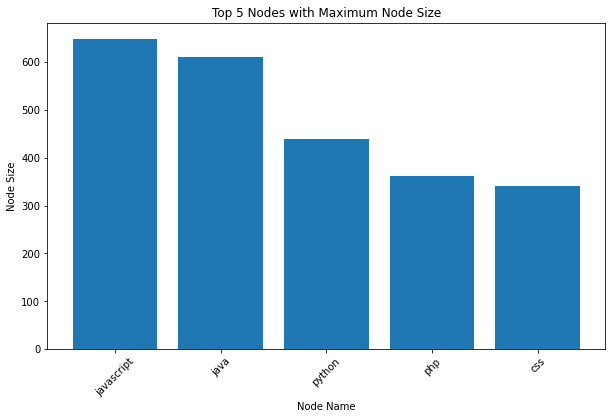

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_nodes['name'], top_5_nodes['nodesize'])
plt.xlabel('Node Name')
plt.ylabel('Node Size')
plt.title('Top 5 Nodes with Maximum Node Size')
plt.xticks(rotation=45)
plt.show()


# Graph 

In [13]:
import networkx as nx
G = nx.from_pandas_edgelist(links_df, "source", "target", edge_attr="value")

In [14]:
print(nx.info(G))

Graph with 115 nodes and 245 edges


C:\Users\sreekutty\AppData\Local\Temp\ipykernel_19976\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


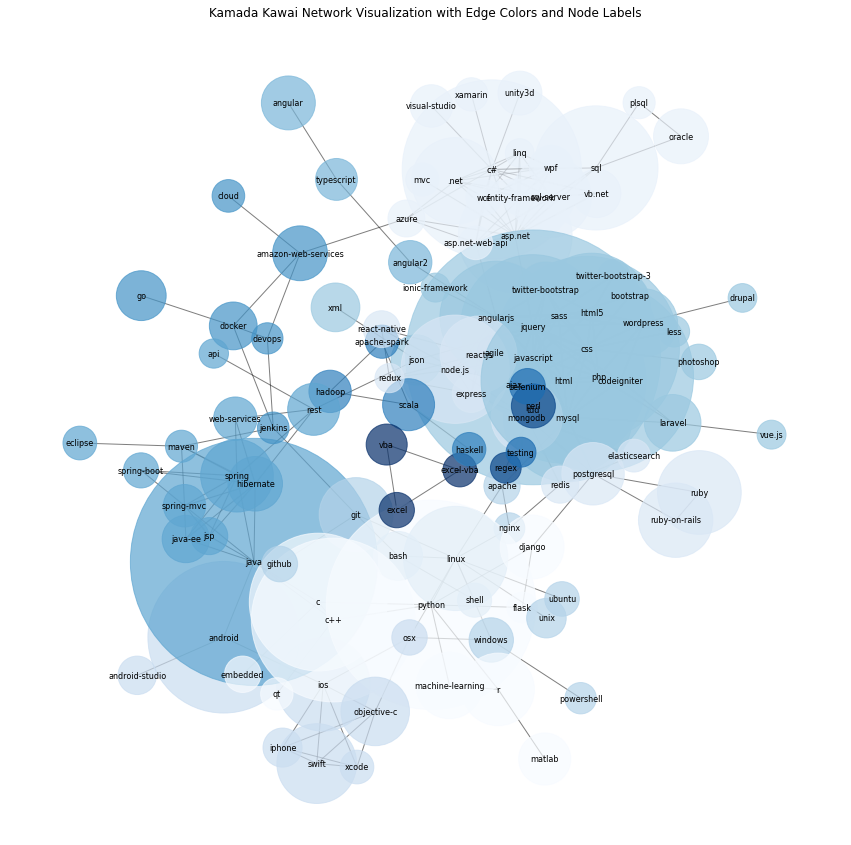

In [15]:
# Visualizing the Graph G
node_attributes = nodes_df.set_index("name")["group"].to_dict()
node_sizes = nodes_df.set_index("name")["nodesize"].to_dict()
node_colors = [node_attributes[node] for node in G.nodes()]
node_sizes = [node_sizes[node] * 100 for node in G.nodes()]
layout = nx.kamada_kawai_layout(G)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(
    G,
    pos=layout,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Blues,
    alpha=0.7,
)


node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos=layout, labels=node_labels, font_size=8, font_color="black")
nx.draw_networkx_edges(
    G,
    pos=layout,
    edge_color="black",
    edge_cmap=plt.cm.YlOrRd,
    alpha=0.5,
)

plt.title("Kamada Kawai Network Visualization with Edge Colors and Node Labels")
plt.axis("off")
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\network.jpg"
plt.savefig(output_file_path)

plt.show()


## CENTRALITY MEASURES

In [16]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree_Centrality'])
degree_centrality_df

,Degree_Centrality
azure,0.043860
.net,0.070175
sql-server,0.078947
asp.net,0.114035
entity-framework,0.070175
...,...
ruby-on-rails,0.017544
ruby,0.017544
powershell,0.008772
testing,0.008772


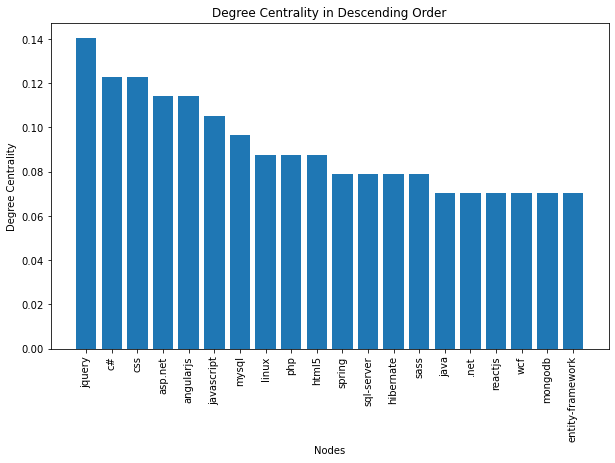

In [17]:
# Sort the DataFrame in descending order of degree centrality
degree_centrality_df = degree_centrality_df.sort_values(by='Degree_Centrality', ascending=False)
top_20_centrality = degree_centrality_df.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_centrality.index, top_20_centrality['Degree_Centrality'])
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality in Descending Order')
plt.xticks(rotation=90)
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Degree_Centrality.png"
plt.savefig(output_file_path)

plt.show()

jquery,c#,angularjs,asp.net,javascript,css,mysql,linux,php,html5,sass,wcd,entity-framework,.net,java,hibernate,mongodb. These nodes have high degree centrality are often considered influential or important within a network. A node with a high degree centrality is likely to have a greater influence on the overall network structure and dynamics.

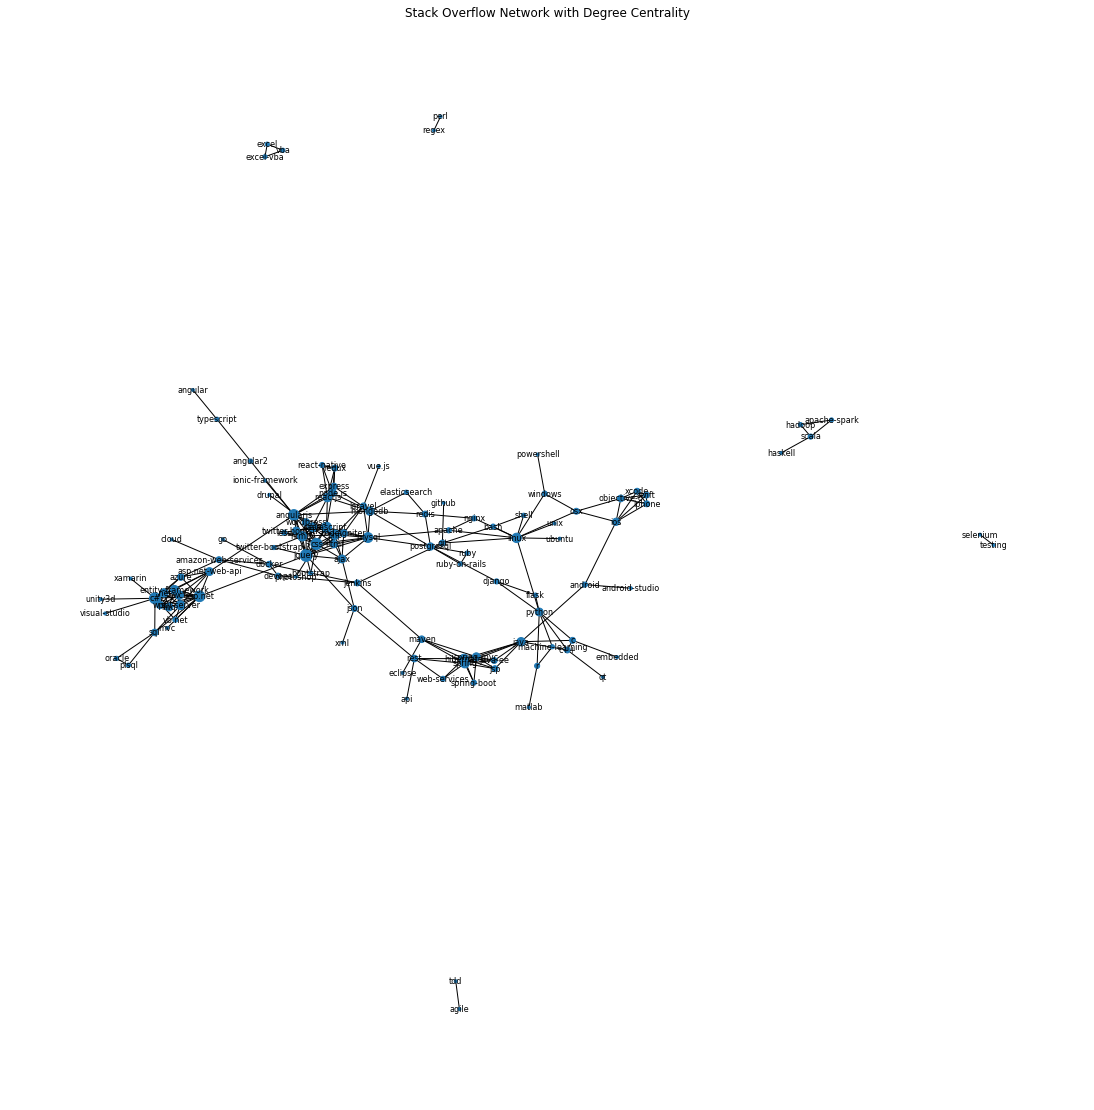

In [18]:
# Visualize the network with node size based on degree centrality
node_size = [degree_centrality[node] * 1000 for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(15,15))

nx.draw(G, pos, with_labels=True, node_size=node_size, cmap=plt.cm.Blues, font_size=8, font_color="black")

plt.title("Stack Overflow Network with Degree Centrality")
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Degree_Centrality_Network.png"
plt.savefig(output_file_path)
plt.show()


# Save the DataFrame to a CSV file
degree_centrality_df.to_csv(r'C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\centrality.csv')

In [19]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
centrality_df = pd.read_csv(r'C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\centrality.csv', index_col=0)
centrality_df['Betweenness_Centrality'] = pd.Series(betweenness_centrality)
centrality_df

# Save the updated DataFrame back to centrality.csv
centrality_df.to_csv(r'C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\centrality.csv')

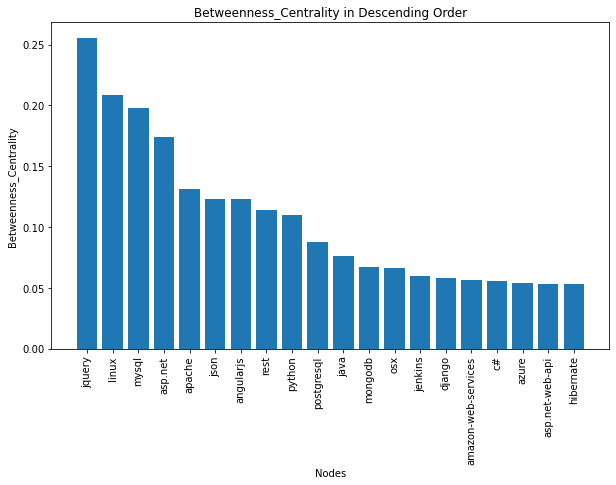

In [20]:
# Sort the DataFrame by betweenness centrality in descending order
centrality_df = centrality_df.sort_values(by='Betweenness_Centrality', ascending=False)

# Select the top 20 nodes
top_20_betweenness = centrality_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_20_betweenness.index, top_20_betweenness['Betweenness_Centrality'])
plt.xlabel('Nodes')
plt.ylabel('Betweenness_Centrality')
plt.title('Betweenness_Centrality in Descending Order')
plt.xticks(rotation=90)
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Betweenness_Centrality.png"
plt.savefig(output_file_path)

plt.show()

jquery,linux,mysql,asp.net,angularjs,apache,json,python,rest,postgresql,java,mongodb,osx,asp.net-web-api,jenkins,django, amazon-web-services,azure,c#,git. These nodes have high betweenness centrality are often critical to the overall network structure. Removing or targeting these nodes can significantly disrupt the flow of information or resources within the network

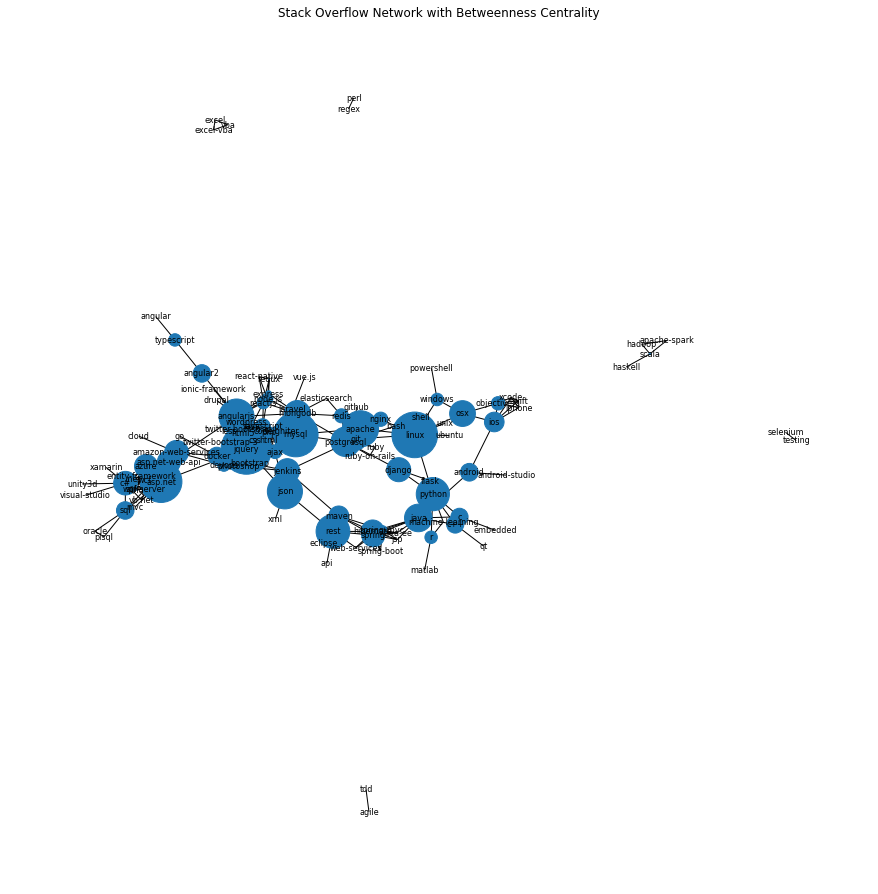

In [21]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
node_size = [betweenness_centrality[node] * 10000 for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=node_size, cmap=plt.cm.Blues, font_size=8, font_color="black")
plt.title("Stack Overflow Network with Betweenness Centrality")
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Betweenness_Centrality_Network.png"
plt.savefig(output_file_path)
plt.show()

In [22]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
centrality_df = pd.read_csv(r'C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\centrality.csv', index_col=0)
centrality_df['Closeness_Centrality'] = pd.Series(closeness_centrality)
centrality_df

# Save the updated DataFrame back to centrality.csv
centrality_df.to_csv(r'C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\StackOverflow\centrality.csv')


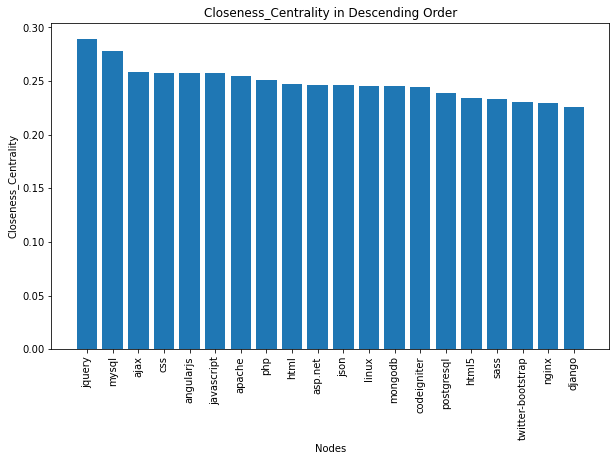

In [23]:
# Sort the DataFrame by betweenness centrality in descending order
centrality_df = centrality_df.sort_values(by='Closeness_Centrality', ascending=False)

# Select the top 20 nodes
top_20_closeness = centrality_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_20_closeness.index, top_20_closeness['Closeness_Centrality'])
plt.xlabel('Nodes')
plt.ylabel('Closeness_Centrality')
plt.title('Closeness_Centrality in Descending Order')
plt.xticks(rotation=90)
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Closeness_Centrality.png"
plt.savefig(output_file_path)

plt.show()

jquery,mysql,angularjs,css,ajax,javascript,apache,php,mongodb,asp.net,json,html,linux,codeigniter,postgresql,sass,html5,twitter-bootstrap,nginx,django. These nodes have high closeness centrality are considered central within a network. They are typically the most efficient points for information dissemination or resource distribution, as they can reach other nodes quickly.

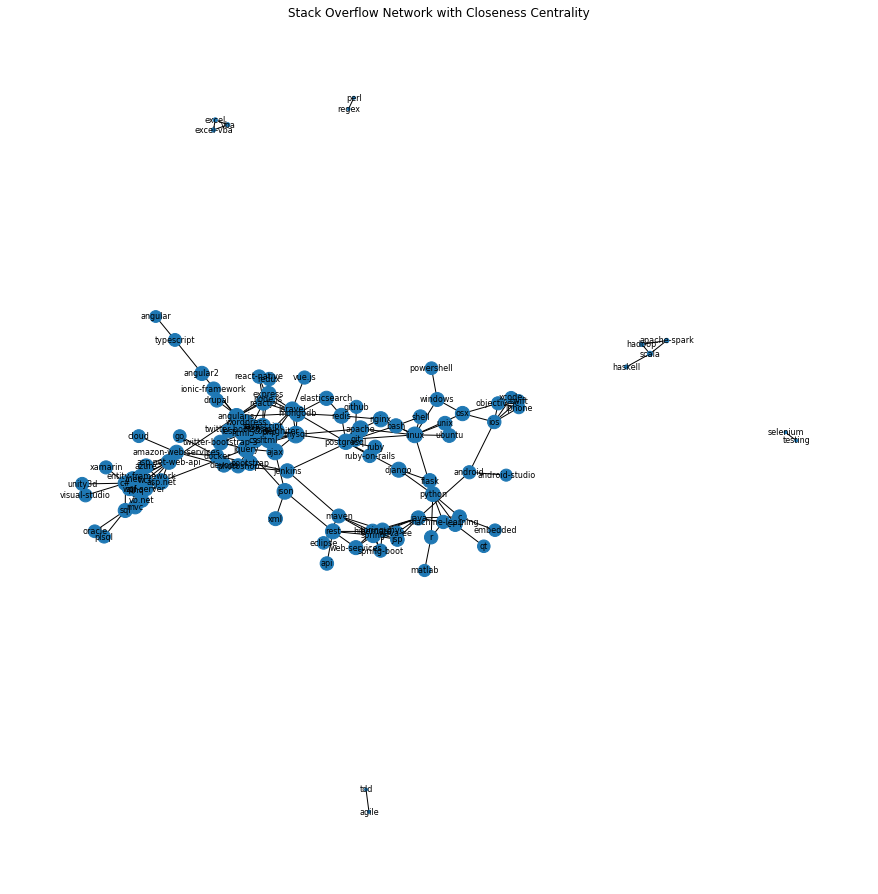

In [24]:
# Visualize the network with node size based on closeness centrality
node_size = [closeness_centrality[node] * 1000 for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=node_size, cmap=plt.cm.Blues, font_size=8, font_color="black")
plt.title("Stack Overflow Network with Closeness Centrality")
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Closeness_Centrality_Network.png"
plt.savefig(output_file_path)
plt.show()

In [25]:
centrality_df

,Degree_Centrality,Betweenness_Centrality,Closeness_Centrality
jquery,0.140351,0.255540,0.289587
mysql,0.096491,0.197693,0.277896
ajax,0.061404,0.018885,0.258620
css,0.122807,0.041335,0.257875
angularjs,0.114035,0.122868,0.257133
...,...,...,...
agile,0.008772,0.000000,0.008772
regex,0.008772,0.000000,0.008772
testing,0.008772,0.000000,0.008772
perl,0.008772,0.000000,0.008772


## COMMUNITY DETECTION USING CLUSTERING WALKSTRAP

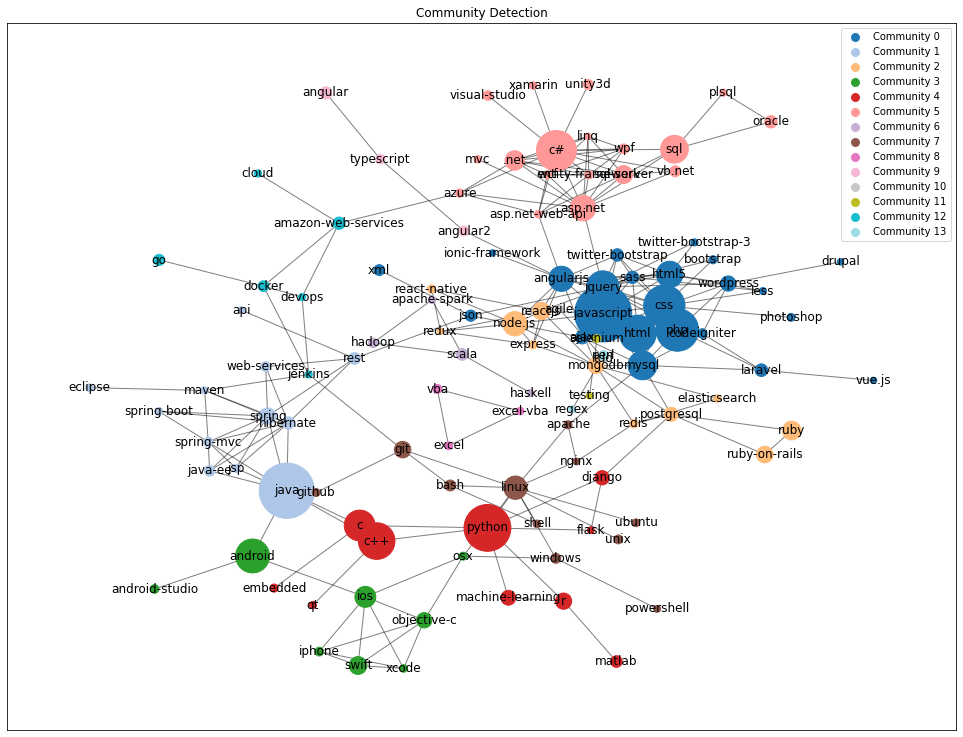

In [26]:
from collections import defaultdict
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a 'nodes_df' DataFrame and a NetworkX graph 'G'
node_attributes={}
for _, row in nodes_df.iterrows():
        node_name = row['name']
        if node_name in G.nodes:
            # Convert the inner tuple to a dictionary
            node_attributes[node_name] = {
                'group': row['group'],
                'nodesize': row['nodesize']
            }
        else:
            print(f"Node '{node_name}' not found in the graph.")

nx.set_node_attributes(G, node_attributes)
partition = node_attributes

# Group nodes by their communities
community_groups = defaultdict(list)
for node, attributes in partition.items():
    group = attributes['group']
    community_groups[group].append(node)

# Plotting the graph with communities
plt.figure(figsize=(17, 13))
pos = nx.kamada_kawai_layout(G)

colors = plt.cm.get_cmap('tab20', len(community_groups))
for i, (community_id, nodes) in enumerate(community_groups.items()):
    color = colors(i)
    node_size = [node_attributes[node]['nodesize'] * 5 for node in nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=[color] * len(nodes), node_size=node_size, label=f'Community {community_id}')

nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.legend().set_visible(False)
plt.title("Community Detection")
# Create legend elements for the communities
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors(i), markersize=10, label=f'Community {i}') for i in range(len(community_groups))]
plt.legend(handles=legend_elements)

# Save and show the plot
output_file_path = r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\Community_Detection.png"
plt.savefig(output_file_path)
plt.show()


In [29]:
import pickle

# Save the partition to the pickle file
with open(r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\partition.pkl", "wb") as f:
    pickle.dump(partition, f)

Partition saved to C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\partition.pkl


## Analyzing Each Community 

In [30]:
from matplotlib.colors import Normalize

def visualize_and_get_community_info(G, nodes_df, target_community_id, node_alpha=0.9):
    node_attributes = {}
    for _, row in nodes_df.iterrows():
        node_name = row['name']
        if node_name in G.nodes:
            # Convert the inner tuple to a dictionary
            node_attributes[node_name] = {
                'group': row['group'],
                'nodesize': row['nodesize']
            }
        else:
            print(f"Node '{node_name}' not found in the graph.")

    nx.set_node_attributes(G, node_attributes)
    partition = node_attributes
    community_groups = defaultdict(list)
    for node, attributes in partition.items():
        group = attributes['group']
        community_groups[group].append(node)


    degree_centrality = nx.degree_centrality(G)
    if target_community_id in community_groups:
        nodes_in_target_community = community_groups[target_community_id]
    else:
        print(f"Community {target_community_id} not found or empty.")
        #return None

    sorted_nodes = sorted(nodes_in_target_community, key=lambda x: degree_centrality[x], reverse=True)
    community_size = len(sorted_nodes)  
    degree_centrality_values = [degree_centrality[node] for node in sorted_nodes]

    community_info = {
        "Community ID": target_community_id,
        "Total Members": community_size,
        "Members (sorted by Degree Centrality)": [
            {"Member": member, "Degree Centrality": centrality}
            for member, centrality in zip(sorted_nodes, degree_centrality_values)
        ]
    }

    community_subgraph = G.subgraph(nodes_in_target_community)
    node_sizes = [25 * nodes_df[nodes_df['name'] == node]['nodesize'].values[0] for node in nodes_in_target_community]
    colormap = plt.get_cmap('Pastel1') 
    norm = Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
    node_colors = [colormap(norm(degree_centrality[node])) for node in community_subgraph.nodes()]
    node_colors_with_alpha = [(r, g, b, node_alpha) for r, g, b, _ in node_colors]
    plt.figure(figsize=(16, 6))
    pos = nx.kamada_kawai_layout(community_subgraph)  
    nx.draw(community_subgraph, pos, with_labels=True, node_size=node_sizes, node_color=node_colors_with_alpha, font_size=10, cmap=colormap)
    plt.title(f"Community {target_community_id} Visualization")
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, orientation="vertical")
    cbar.set_label('Degree Centrality')
    plt.savefig(r"C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\static\community1.png")
    plt.show()

    return community_info


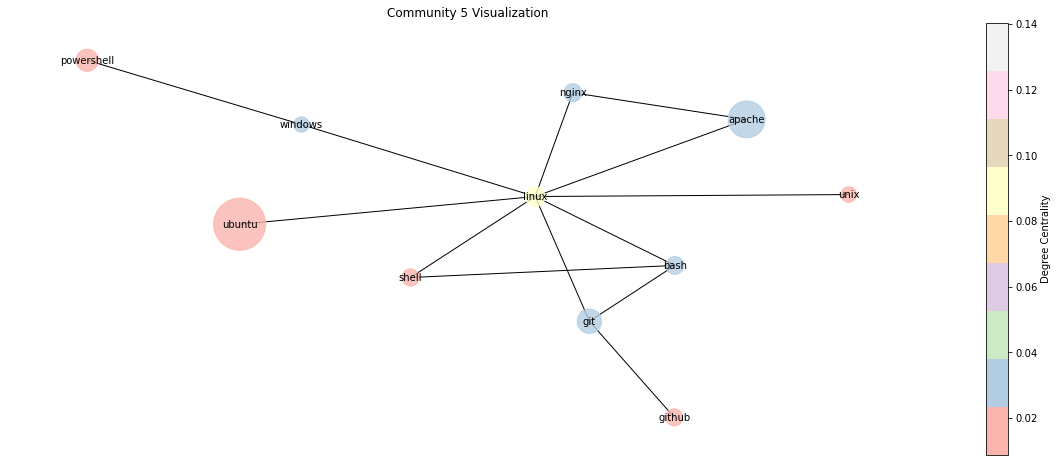

Community 5 Information:
Total Members: 11
Members (sorted by Degree Centrality):
- linux (Degree Centrality: 0.09)
- git (Degree Centrality: 0.04)
- apache (Degree Centrality: 0.03)
- nginx (Degree Centrality: 0.03)
- bash (Degree Centrality: 0.03)
- windows (Degree Centrality: 0.03)
- shell (Degree Centrality: 0.02)
- github (Degree Centrality: 0.01)
- ubuntu (Degree Centrality: 0.01)
- unix (Degree Centrality: 0.01)
- powershell (Degree Centrality: 0.01)


In [31]:
# Example usage:
target_community_id = 5  
node_alpha = 0.8  
community_info = visualize_and_get_community_info(G, nodes_df,target_community_id,  node_alpha)

if community_info:
    print(f"Community {community_info['Community ID']} Information:")
    print(f"Total Members: {community_info['Total Members']}")
    print("Members (sorted by Degree Centrality):")
    for member_info in community_info['Members (sorted by Degree Centrality)']:
        print(f"- {member_info['Member']} (Degree Centrality: {member_info['Degree Centrality']:.2f})")
else:
    print(f"Community {target_community_id} not found or empty.")

In [32]:
# Save relevant data to a pickle file
with open(r'C:\Users\sreekutty\OneDrive\Desktop\Project_SMA\community_data.pkl', 'wb') as f:
    pickle.dump((G, node_attributes, nodes_df), f)

## Recommendation System

In [33]:
def get_top_recommendations(G, target_node, num_recommendations=10):
    # Calculate Jaccard similarity with other nodes
    def jaccard_similarity(node1, node2):
        neighbors1 = set(G.neighbors(node1))
        neighbors2 = set(G.neighbors(node2))
        common_neighbors = neighbors1.intersection(neighbors2)
        if len(common_neighbors) == 0:
            return 0.0
        return len(common_neighbors) / (len(neighbors1) + len(neighbors2) - len(common_neighbors))

    # Calculate Jaccard similarities between the target node and all other nodes
    similarities = [(node, jaccard_similarity(target_node, node)) for node in G.nodes() if node != target_node]
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    top_recommendations = [node for node, similarity in sorted_similarities[:num_recommendations]]

    return top_recommendations

In [34]:
target_node = "html"
recommendations = get_top_recommendations(G, target_node, num_recommendations=10)
print(f"Top recommendations for node {target_node}: {recommendations}")

Top recommendations for node html: ['ajax', 'twitter-bootstrap', 'html5', 'javascript', 'codeigniter', 'css', 'php', 'bootstrap', 'wordpress', 'mysql']
